# Tech Challenge - Fase 1: Predição de Ataque Cardíaco

## Análise de Dados e Machine Learning para Diagnóstico Médico

**Objetivo:** Criar um sistema de apoio ao diagnóstico médico que utilize técnicas de Machine Learning para estimar a probabilidade de ocorrência de um ataque cardíaco a partir de informações clínicas e demográficas de pacientes.

**Base de Dados:** Heart Attack Prediction - Indonesia

---

## 1. Introdução e Contexto do Problema

As doenças cardiovasculares continuam sendo uma das principais causas de morte em todo o mundo. Milhares de pessoas perdem a vida todos os anos em decorrência de eventos cardíacos que, em muitos casos, poderiam ser evitados com uma detecção precoce e um acompanhamento adequado.

Neste projeto, buscamos desenvolver um modelo preditivo capaz de identificar pacientes com maior risco de sofrer um ataque cardíaco. A proposta é aplicar técnicas de Machine Learning sobre dados clínicos estruturados, de forma a extrair padrões e indicadores relevantes que auxiliem no processo de triagem e tomada de decisão médica.

Com isso o dataset apresenta cenários com diversas variaveis e a variavel alvo diz se ele teve ataque cardiaco ou não!

Ao automatizar parte dessa análise, espera-se reduzir o tempo necessário para a identificação de casos críticos e apoiar profissionais da saúde no planejamento de intervenções preventivas mais eficazes.




## 2. Bibliotecas 

In [37]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn shap

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Exibição de dataframes
from IPython.display import display

# Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


## 3. Carregamento e Exploração Inicial dos Dados

#dados tecnicos, tamanho, colunas, quanto vai alocar de ram para eu trabalhar

In [38]:
# Carregar o dataset
df = pd.read_csv('./dataset/heart_attack_prediction_indonesia.csv')



In [39]:
print("INFORMAÇÕES GERAIS DO DATASET")
print(f"Dimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
# --- Informações Gerais do DataFrame ---
print("\n--- Informações do DataFrame ---")
df.info()

# --- Tipos de Dados ---
print("\n--- Tipos de Dados ---")
print(df.dtypes)

# --- Primeiras e Últimas Linhas ---
print("\n--- Primeiras 5 Linhas ---")
display(df.head())

print("\n--- Últimas 5 Linhas ---")
display(df.tail())


INFORMAÇÕES GERAIS DO DATASET
Dimensões do dataset: 158355 linhas x 28 colunas
Memória utilizada: 102.34 MB

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1



--- Últimas 5 Linhas ---


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1
158354,61,Male,Urban,Middle,0,0,190,0,81,0,...,81,95,49,125,149,Abnormal,0,0,1,0


In [40]:


# Informações sobre tipos de dados e valores nulos
print("INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS")
df.info()



INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             635

In [41]:
# Verificar valores nulos, elementos que posso tirar, pois atrapalhariam em minha analise.

print("ANÁLISE DE VALORES AUSENTES")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual (%)': missing_percentage
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)


print(missing_df)


ANÁLISE DE VALORES AUSENTES
                     Valores Ausentes  Percentual (%)
alcohol_consumption             94848       59.895804


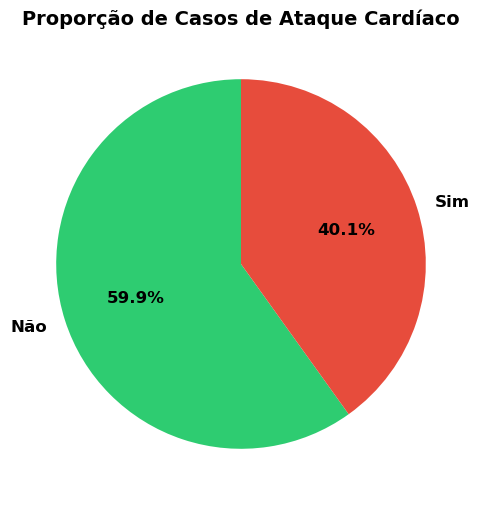

In [42]:
#entender a distribuição da variável alvo 'heart_attack'

target_counts = df['heart_attack'].value_counts()
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Não', 'Sim'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proporção de Casos de Ataque Cardíaco', fontsize=14, fontweight='bold')
plt.show()


## 4. Análise Exploratória de Dados 

### 4.1 Análise de Variáveis Categóricas

In [43]:
#Identificar variáveis categóricas ou de agrupamento 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Variáveis Categóricas:")
print(categorical_cols)
print(f"\nTotal: {len(categorical_cols)} variáveis categorizadoras")

Variáveis Categóricas:
['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']

Total: 10 variáveis categorizadoras


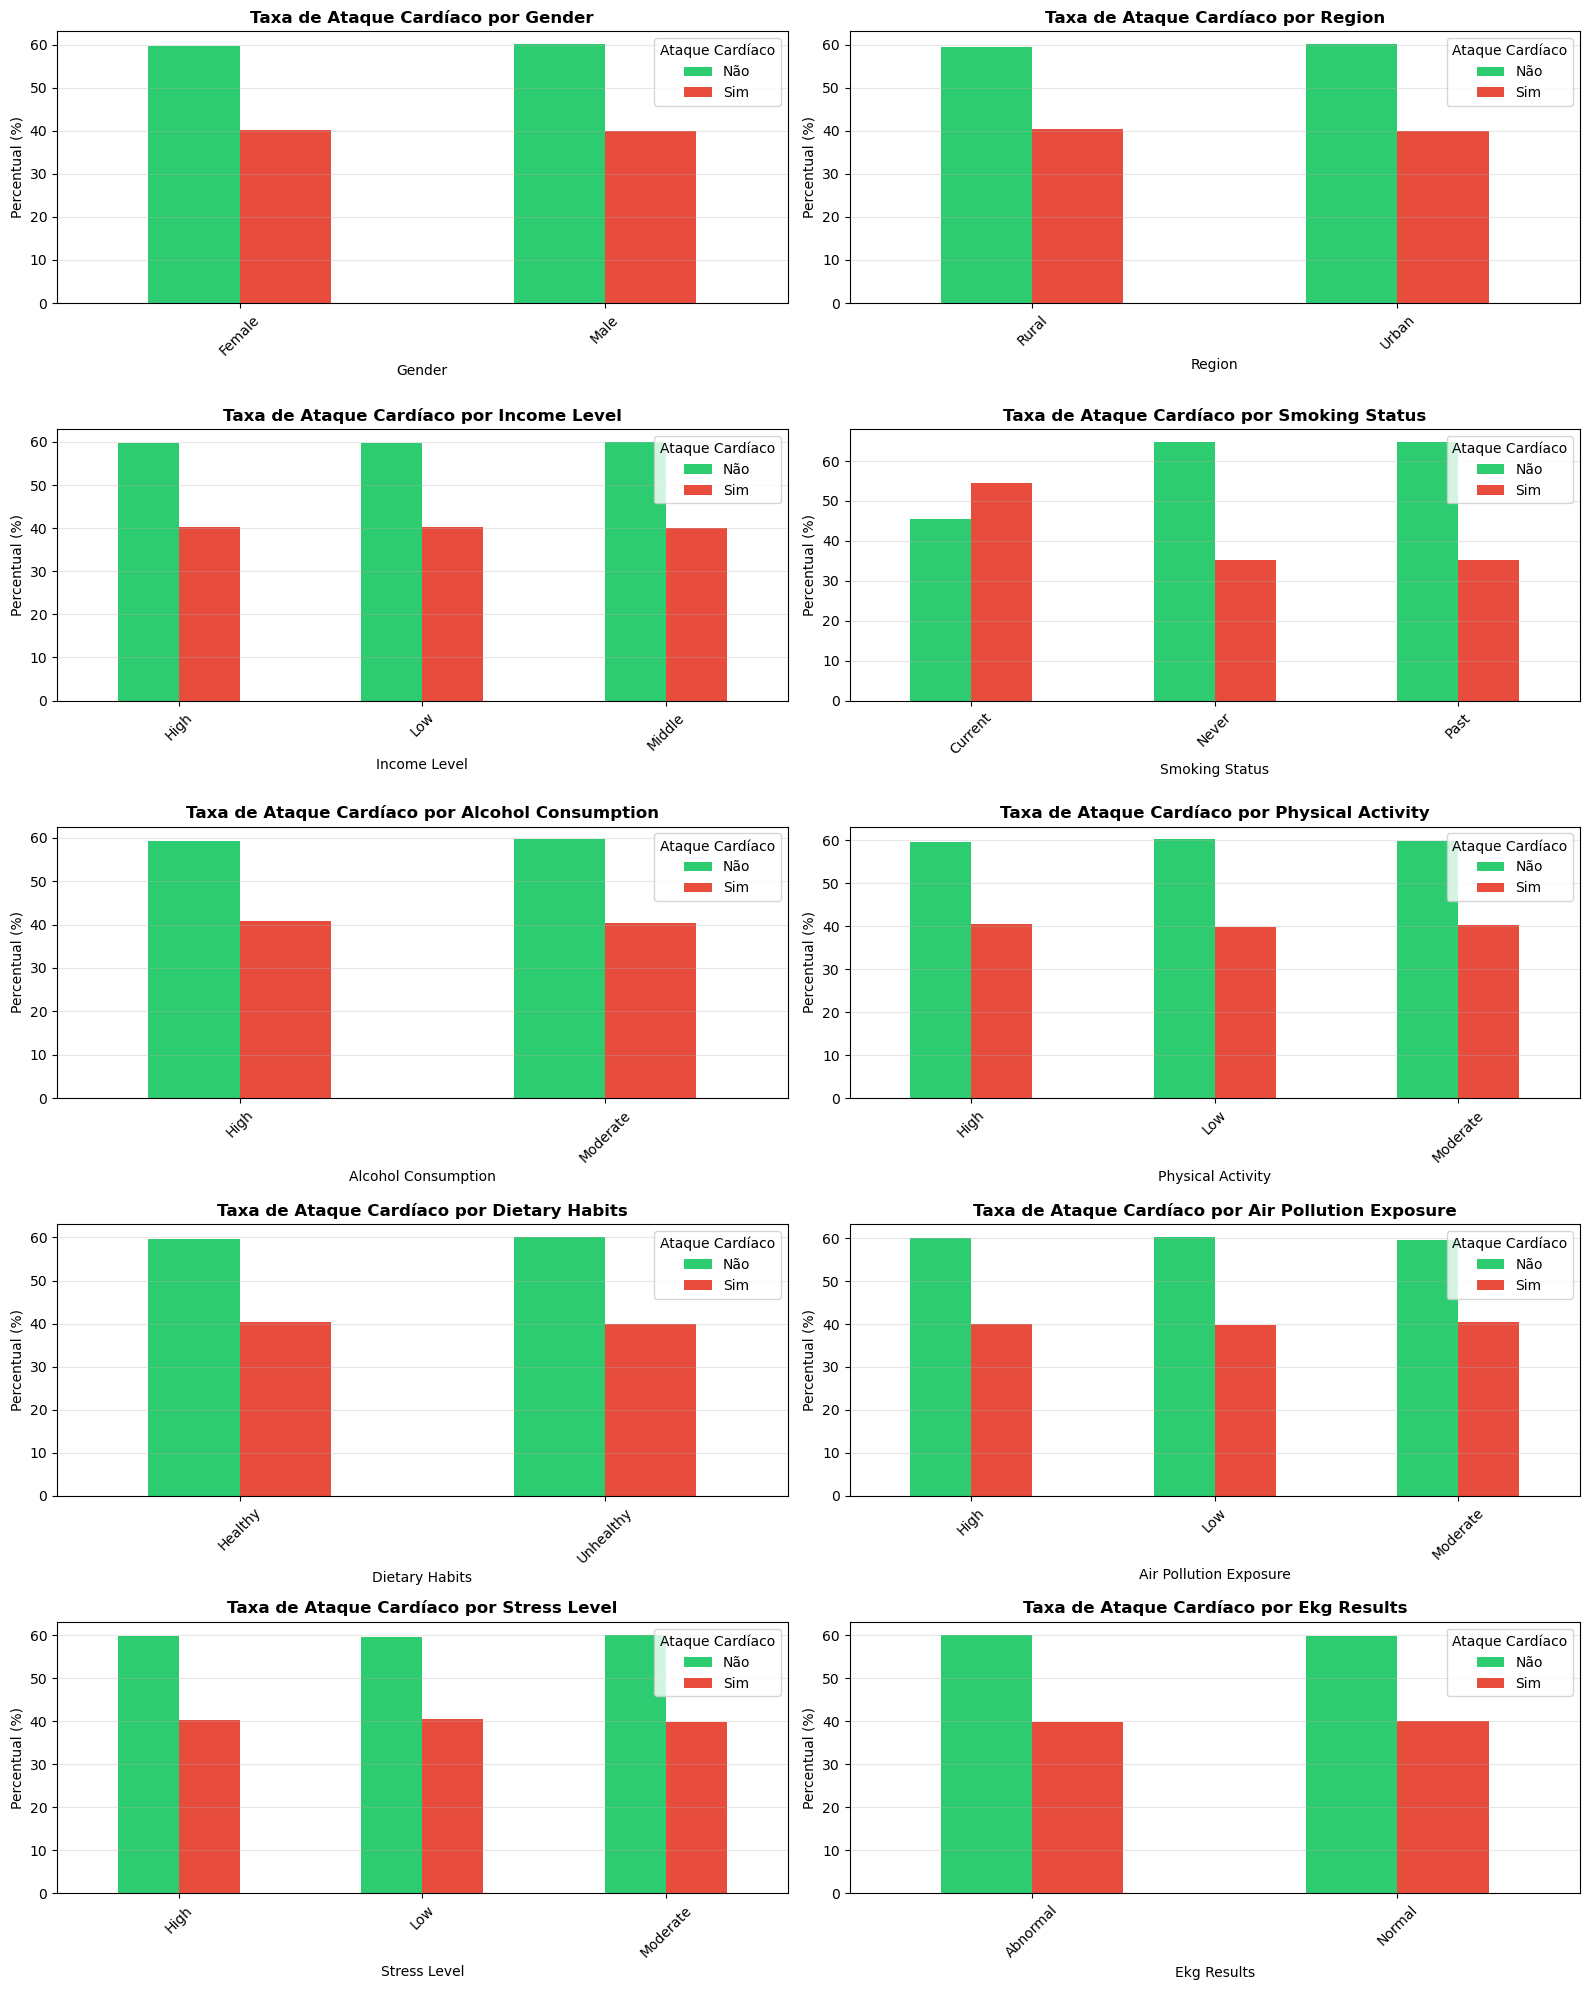

In [44]:
# Análise de variáveis categóricas vs target


fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        cross_tab = pd.crosstab(df[col], df['heart_attack'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'Taxa de Ataque Cardíaco por {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Percentual (%)', fontsize=10)
        axes[idx].legend(['Não', 'Sim'], title='Ataque Cardíaco')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Análise de Variáveis Numéricas

In [45]:
    # Identificar variáveis numéricas 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('heart_attack')  # Remover a variável comparativa 

print("Variáveis Numéricas:")
print(numerical_cols)
print(f"\nTotal: {len(numerical_cols)} variáveis numéricas")

Variáveis Numéricas:
['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']

Total: 17 variáveis numéricas


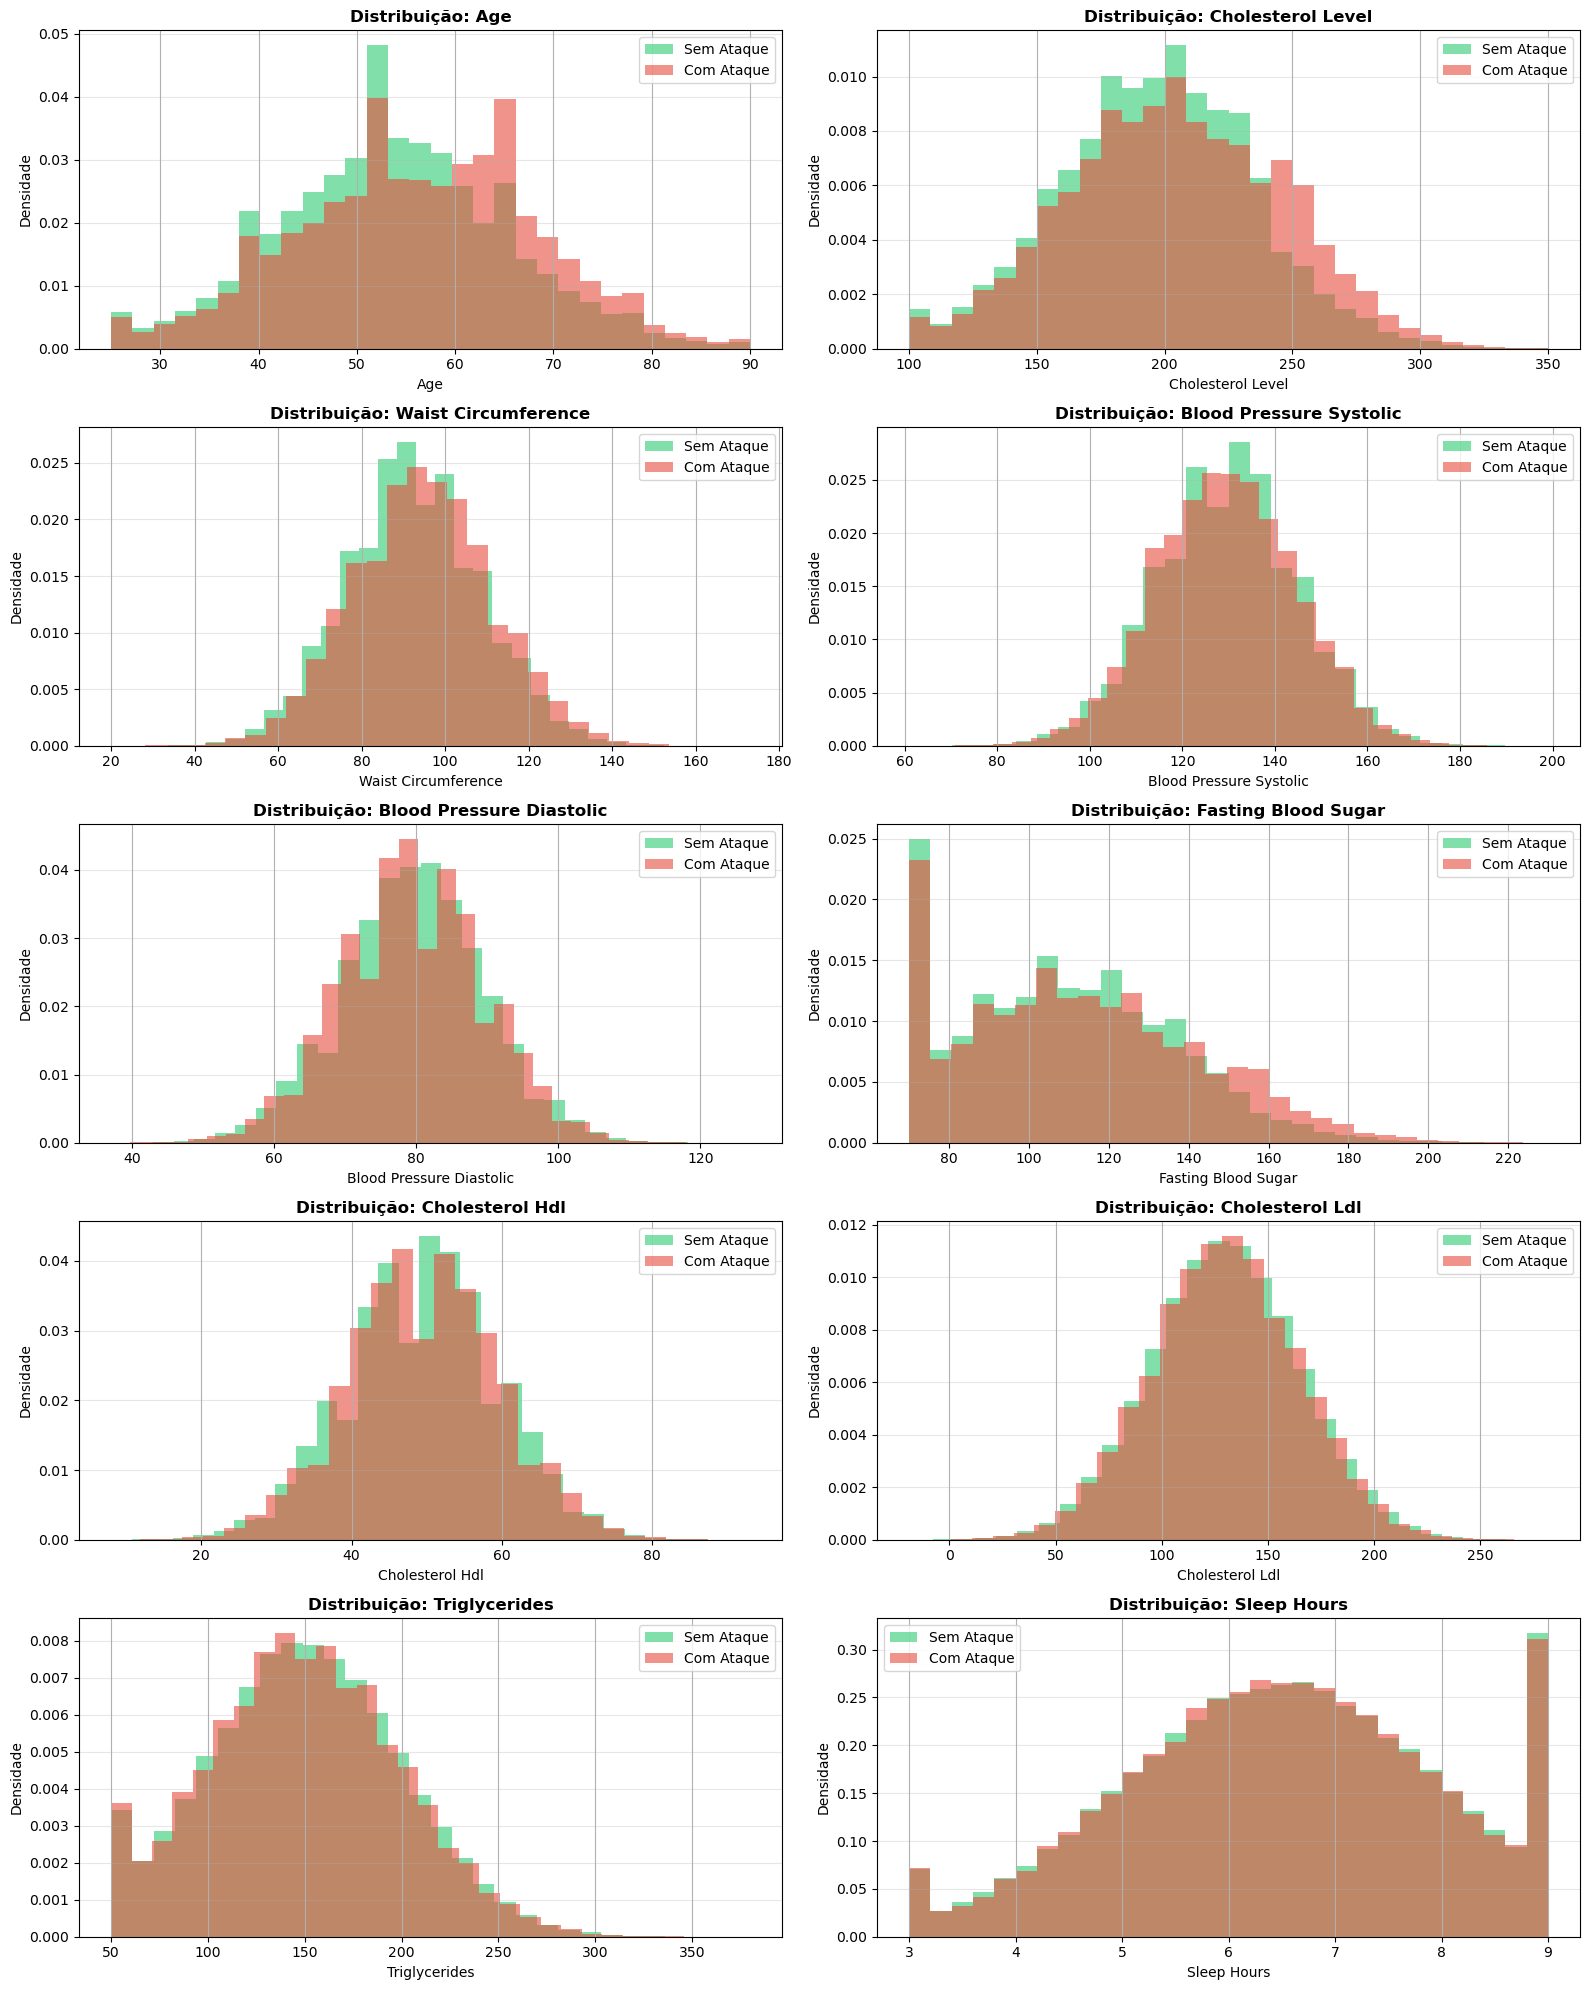

In [46]:
# Distribuição das principais variáveis numéricas
key_numerical = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                'cholesterol_ldl', 'triglycerides', 'sleep_hours']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        # Histograma com KDE
        df[df['heart_attack'] == 0][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Sem Ataque', color='#2ecc71', density=True)
        df[df['heart_attack'] == 1][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Com Ataque', color='#e74c3c', density=True)
        
        axes[idx].set_title(f'Distribuição: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Densidade', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
#plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

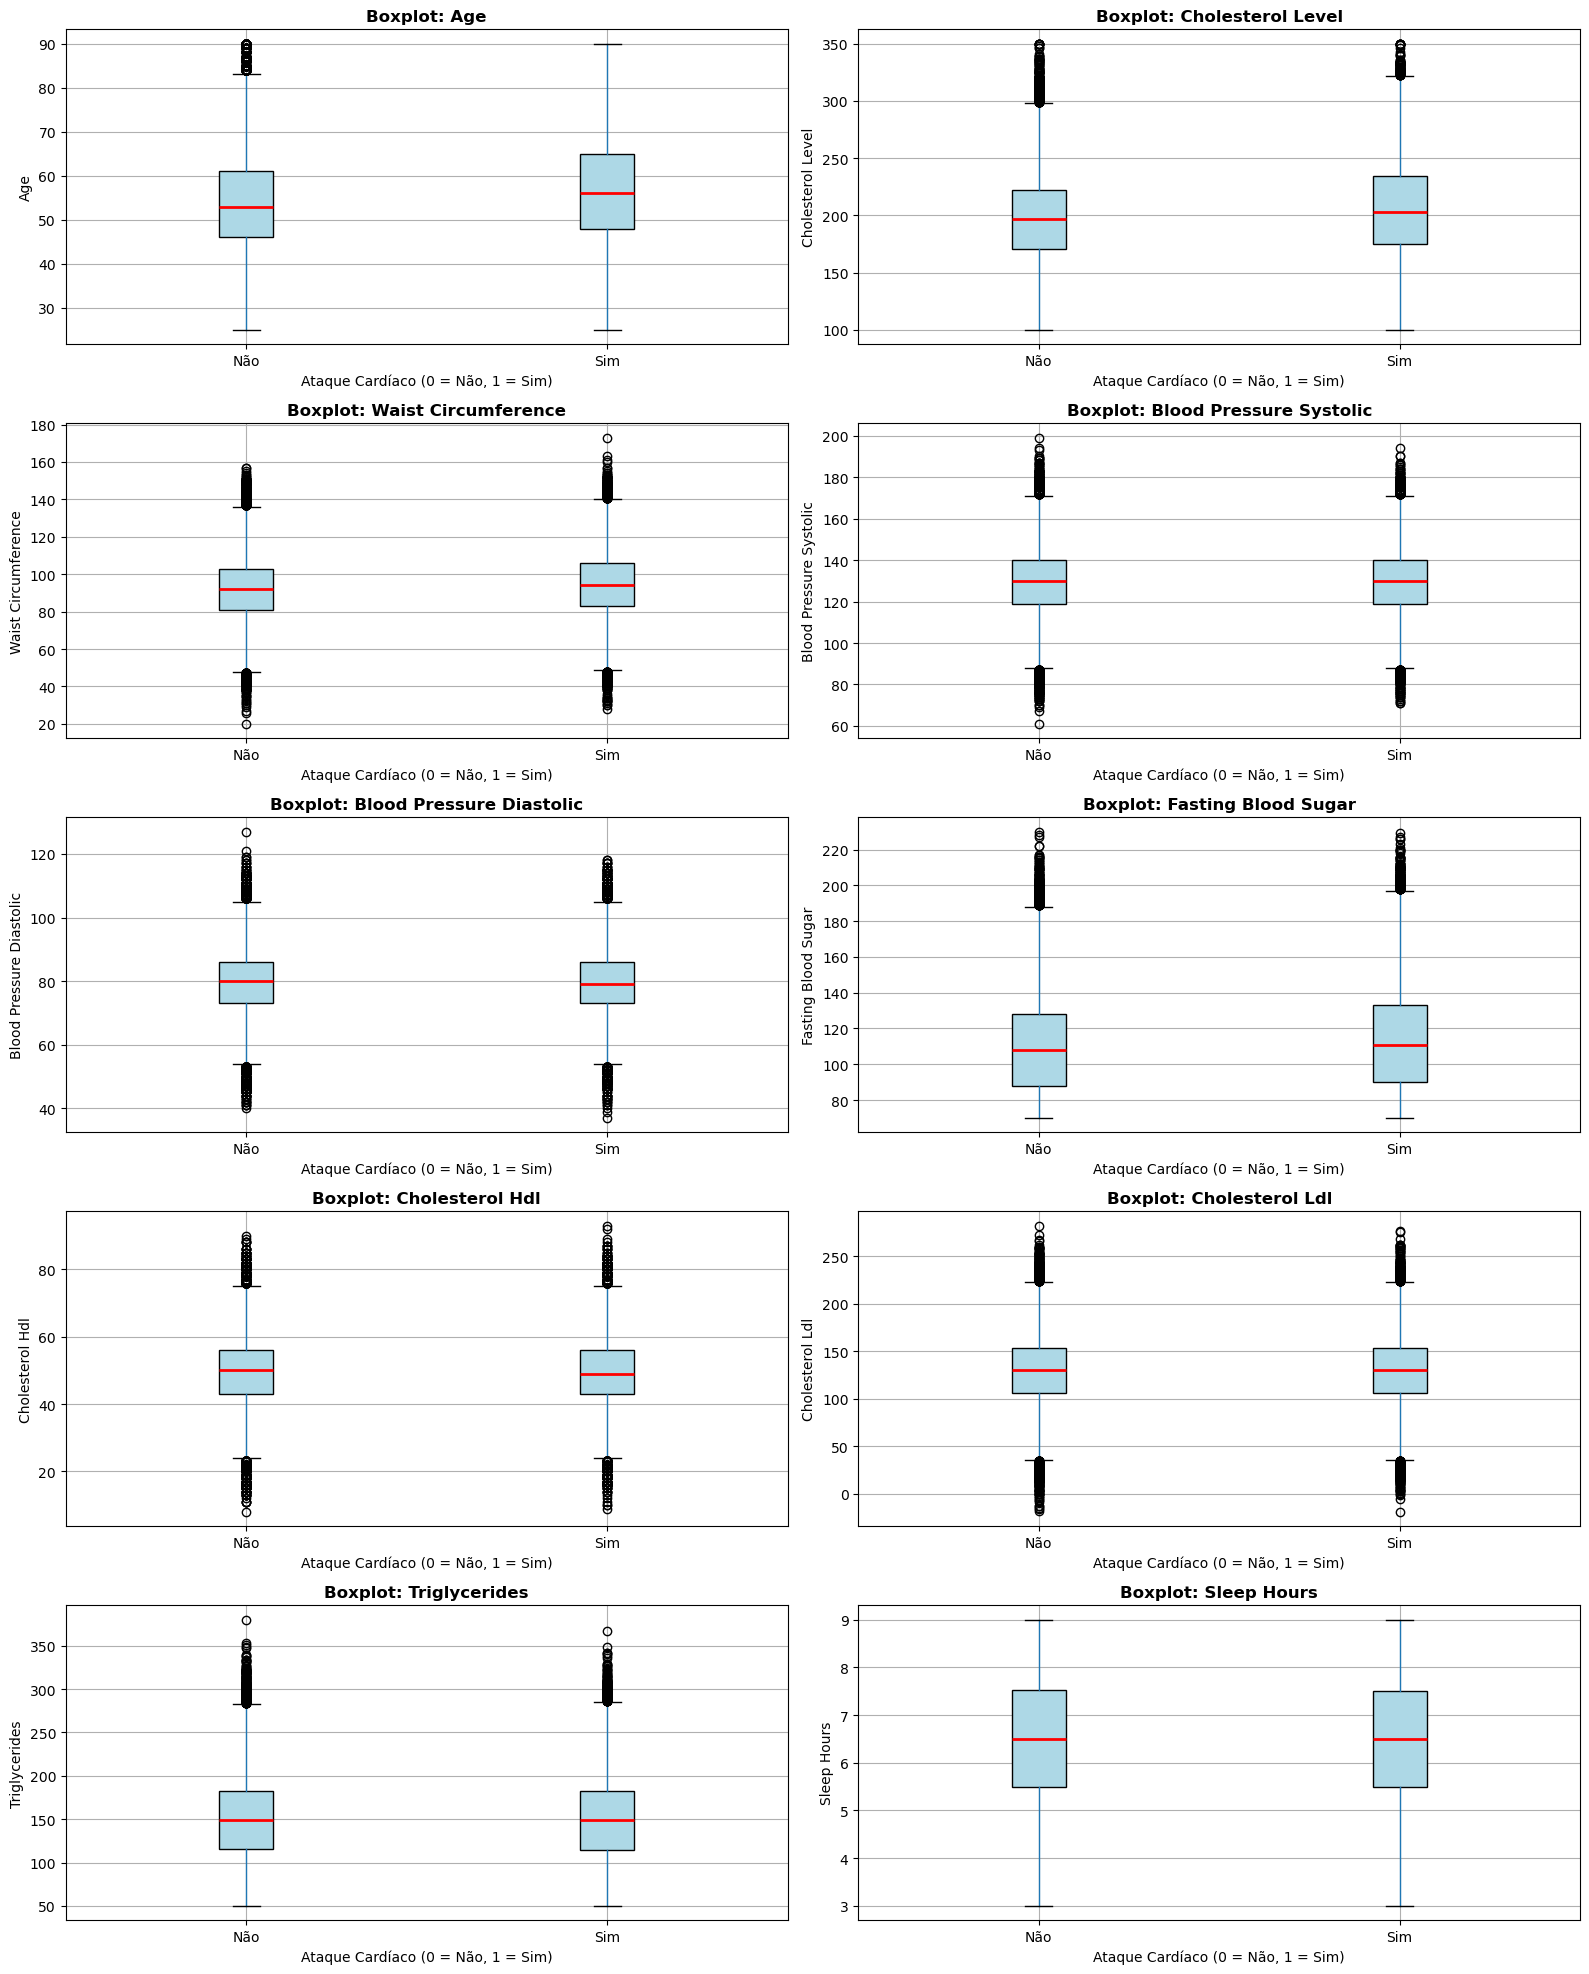

In [47]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        df.boxplot(column=col, by='heart_attack', ax=axes[idx], 
                  patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'),
                  medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Boxplot: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Ataque Cardíaco (0 = Não, 1 = Sim)', fontsize=10)
        axes[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['Não', 'Sim'])

plt.suptitle('')  # Remove o título automático do pandas
plt.tight_layout()
#plt.savefig('numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Análise de Correlação

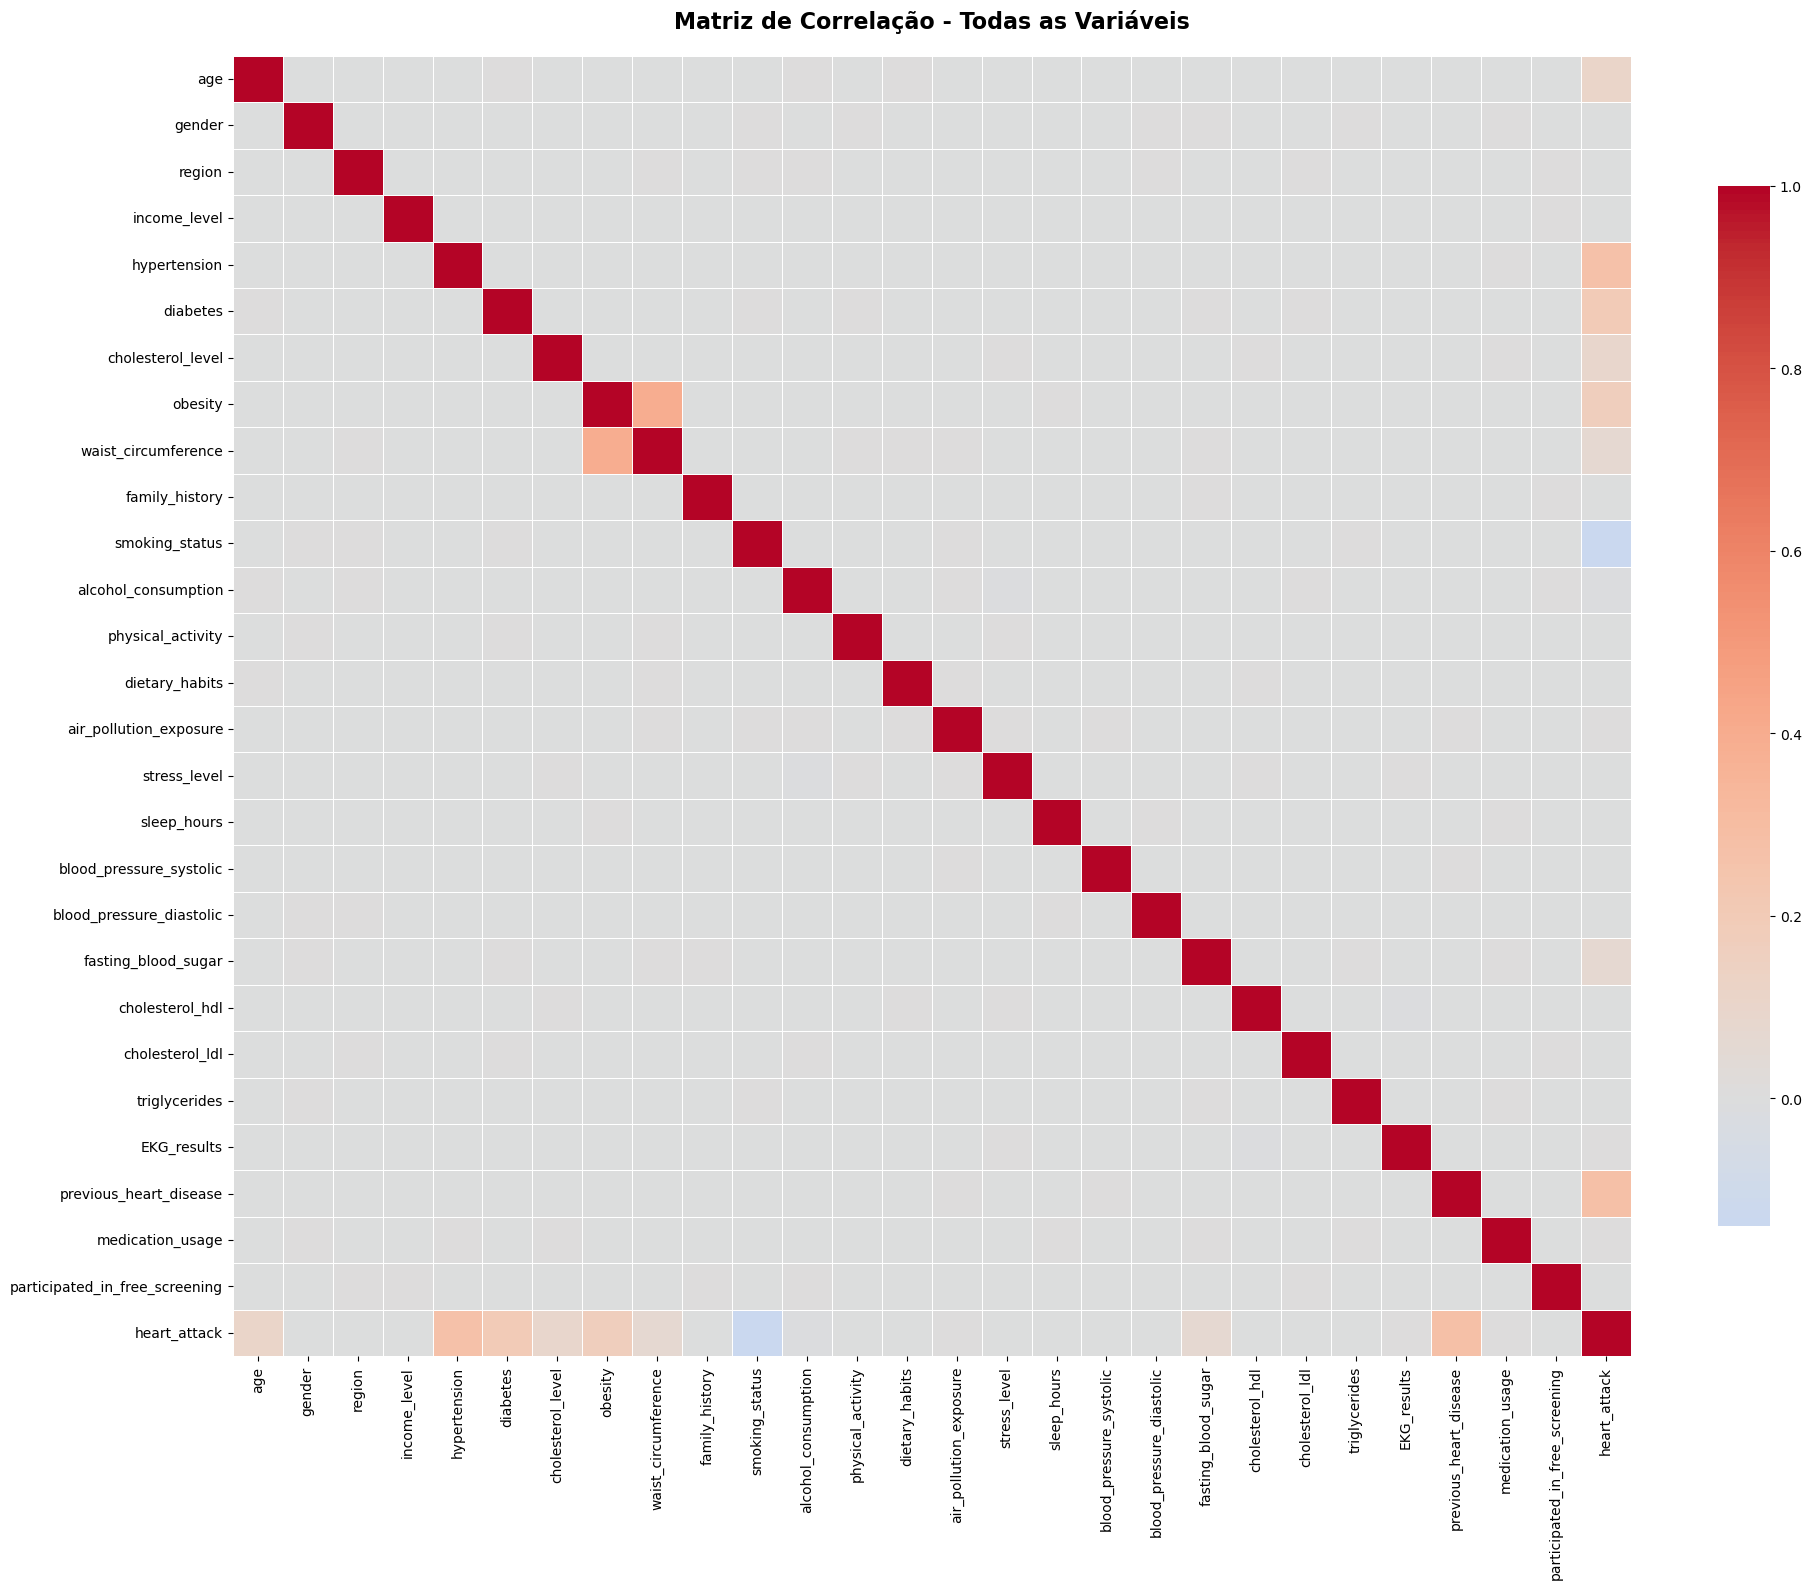

In [48]:
# Criar uma cópia do dataframe para análise de correlação
df_corr = df.copy()

# Codificar variáveis categóricas para análise de correlação
le = LabelEncoder()
for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Calcular matriz de correlação
correlation_matrix = df_corr.corr()

# Visualizar matriz de correlação completa
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Variáveis', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
#plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)
heart_attack                      100.00
previous_heart_disease             27.48
hypertension                       26.93
diabetes                           19.45
obesity                            17.17
age                                10.58
cholesterol_level                   9.26
fasting_blood_sugar                 6.98
waist_circumference                 6.79
medication_usage                    0.47
air_pollution_exposure              0.39
EKG_results                         0.26
family_history                      0.14
sleep_hours                         0.07
cholesterol_hdl                     0.06
cholesterol_ldl                     0.06
blood_pressure_diastolic           -0.03
triglycerides                      -0.07
physical_activity                  -0.08
blood_pressure_systolic            -0.16
income_level                       -0.19
stress_level                       -0.34
gender                             -0.35
particip

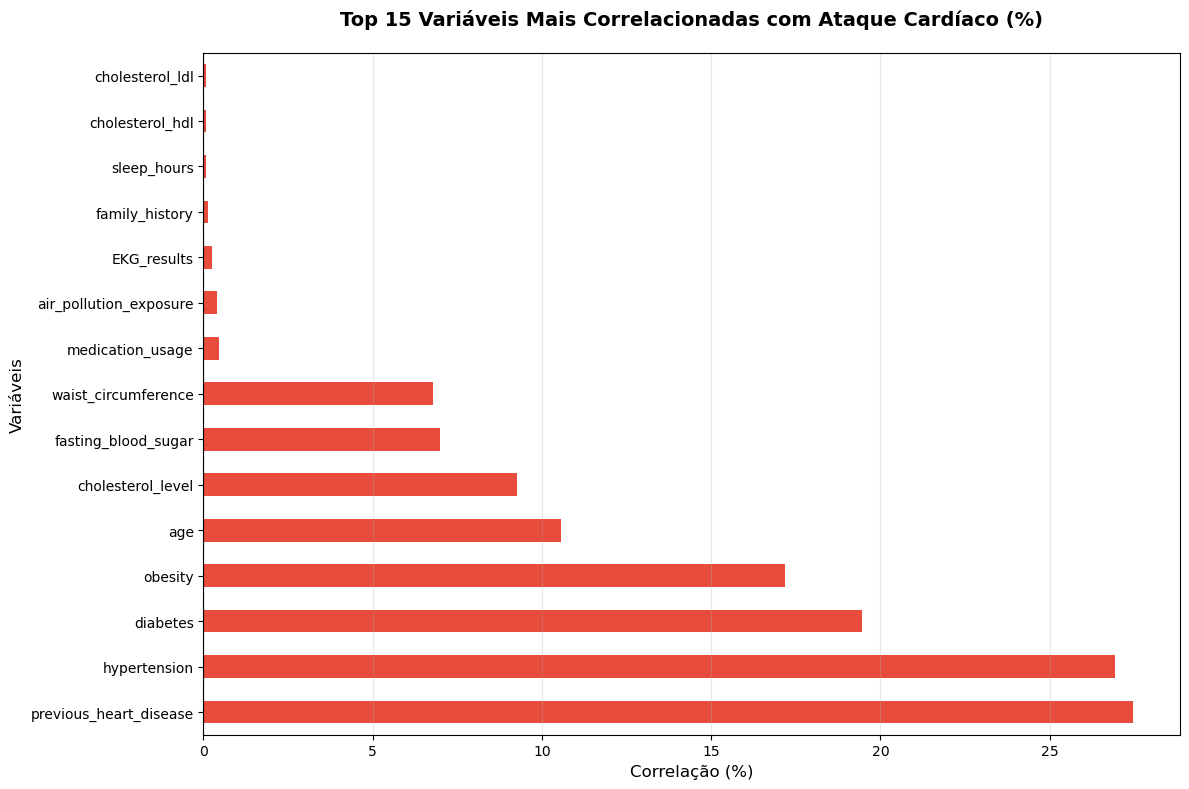

In [49]:
# Correlação com a variável target
target_correlation = correlation_matrix['heart_attack'].sort_values(ascending=False)

# Converter correlação em porcentagem
target_correlation_percent = target_correlation * 100

print("CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)")
print(target_correlation_percent.round(2))  # Arredondar para 2 casas decimais

# Visualizar top 15 correlações com o target
plt.figure(figsize=(12, 8))
top_corr = target_correlation_percent[1:16]  # Excluir a própria variável target

# Cores para correlações positivas e negativas
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr]

# Gráfico
top_corr.plot(kind='barh', color=colors)
plt.title('Top 15 Variáveis Mais Correlacionadas com Ataque Cardíaco (%)', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Correlação (%)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Pré-processamento de Dados

### 5.1 Tratamento de Valores Ausentes e Inconsistências

In [50]:
# Verificar valores inconsistentes em variáveis numéricas

print("VERIFICAÇÃO DE VALORES INCONSISTENTES")
# Verificar valores negativos onde não deveriam existir
numerical_positive = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                     'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                     'cholesterol_ldl', 'triglycerides', 'sleep_hours']

for col in numerical_positive:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️ {col}: {negative_count} valores negativos encontrados")
        else:
            print(f"✓ {col}: Sem valores negativos")

print("\n✓ Verificação de inconsistências concluída.")

VERIFICAÇÃO DE VALORES INCONSISTENTES
✓ age: Sem valores negativos
✓ cholesterol_level: Sem valores negativos
✓ waist_circumference: Sem valores negativos
✓ blood_pressure_systolic: Sem valores negativos
✓ blood_pressure_diastolic: Sem valores negativos
✓ fasting_blood_sugar: Sem valores negativos
✓ cholesterol_hdl: Sem valores negativos
⚠️ cholesterol_ldl: 14 valores negativos encontrados
✓ triglycerides: Sem valores negativos
✓ sleep_hours: Sem valores negativos

✓ Verificação de inconsistências concluída.


### 5.2 Pipeline de Pré-processamento

In [51]:
# Separar features e target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']


print("SEPARAÇÃO DE FEATURES E TARGET")

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")
print(f"\nDistribuição do target:")
print(y.value_counts())

print("\nDistribuição do target (em %):")
print((y.value_counts(normalize=True) * 100).round(2))

SEPARAÇÃO DE FEATURES E TARGET
Shape de X (features): (158355, 27)
Shape de y (target): (158355,)

Distribuição do target:
heart_attack
0    94854
1    63501
Name: count, dtype: int64

Distribuição do target (em %):
heart_attack
0    59.9
1    40.1
Name: proportion, dtype: float64


In [52]:
# Codificar variáveis categóricas

print("CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")


X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col}: {len(le.classes_)} categorias codificadas")

print(f"\n✓ Total de {len(label_encoders)} variáveis categóricas codificadas.")

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
✓ gender: 2 categorias codificadas
✓ region: 2 categorias codificadas
✓ income_level: 3 categorias codificadas
✓ smoking_status: 3 categorias codificadas
✓ alcohol_consumption: 3 categorias codificadas
✓ physical_activity: 3 categorias codificadas
✓ dietary_habits: 2 categorias codificadas
✓ air_pollution_exposure: 3 categorias codificadas
✓ stress_level: 3 categorias codificadas
✓ EKG_results: 2 categorias codificadas

✓ Total de 10 variáveis categóricas codificadas.


In [53]:
# Divisão em conjuntos de treino, validação e teste

print("DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE")
print("="*80)

# Primeiro split: 70% treino, 30% temporário (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Segundo split: dividir os 30% em 15% validação e 15% teste
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Conjunto de Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribuição do target em cada conjunto:")
print(f"Treino: {y_train.value_counts().to_dict()}")
print(f"Validação: {y_val.value_counts().to_dict()}")
print(f"Teste: {y_test.value_counts().to_dict()}")

DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE
Conjunto de Treino: 110848 amostras (70.0%)
Conjunto de Validação: 23753 amostras (15.0%)
Conjunto de Teste: 23754 amostras (15.0%)

Distribuição do target em cada conjunto:
Treino: {0: 66398, 1: 44450}
Validação: {0: 14228, 1: 9525}
Teste: {0: 14228, 1: 9526}


In [54]:
# Normalização das features

print("NORMALIZAÇÃO DAS FEATURES")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✓ Features normalizadas usando StandardScaler")
print(f"\nMédia das features após normalização (treino): {X_train_scaled.mean():.6f}")
print(f"Desvio padrão das features após normalização (treino): {X_train_scaled.std():.6f}")

NORMALIZAÇÃO DAS FEATURES
✓ Features normalizadas usando StandardScaler

Média das features após normalização (treino): -0.000000
Desvio padrão das features após normalização (treino): 1.000000
